# Supervised Machine Learning by @attzulkafli.

## Classification

# 1. k-Nearest Neighbours: Algorithm


``k-Nearest Neighbours (KNN)`` falls in the **supervised learning** family of algorithms and it is a famous classification algorithm because it is easy to understand and its good performance however, it is computationally expensive. The KNN algorithm classifies an unlabelled test sample based on the majority of similar samples among the k number of its nearest neighbors. 


 The basic KNN classifier steps can be described as follows:
- 1. **Training phase:** The training samples and the class labels of these samples are stored. no missing data 
       allowed. No non-numeric features allowed in case of using Euclidian distance. In case of categorical 
       features new distance function should be defined.<br><br>
- 2. **Classification phase:** Each test sample is classified using majority vote of its neighbors by the following
       steps: <br>
       a) Distances from the test sample to all stored training sample are calculated using a specific distance function or similarity measure. <br><br>
       b) The K nearest neighbors of the test sample are selected, where K is a pre-defined small integer. <br><br>
       c) The most repeated class of these K neighbors is assigned to the test sample. In other words, a test sample is assigned to the class c if it is the most frequent class label among the K nearest training samples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


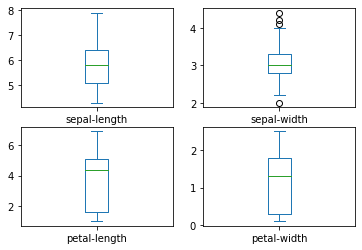

In [5]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

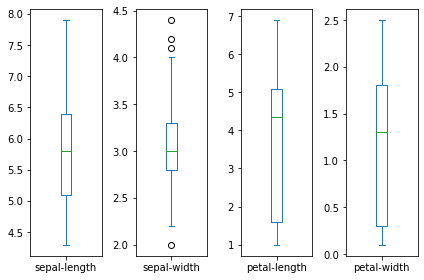

In [6]:
dataset.plot(kind='box', subplots=True)
plt.tight_layout()
plt.show()

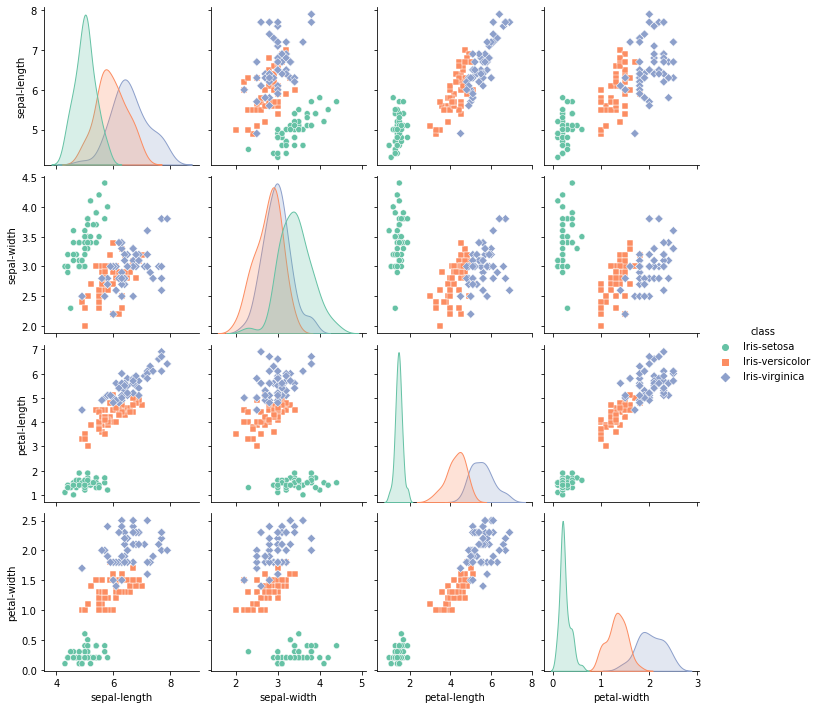

In [7]:
sns.pairplot(dataset, kind="scatter", hue="class", markers=["o", "s", "D"], palette="Set2")
plt.show()

In [4]:
X = dataset.drop('class', axis=1)
y = dataset['class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
species_prediction = knn.predict([[2, 3.2, 1.5, 0.5]])
print('species name is '+species_prediction[0])


species name is Iris-setosa


In [7]:
knn.score(X_test, y_test)

0.8947368421052632

How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

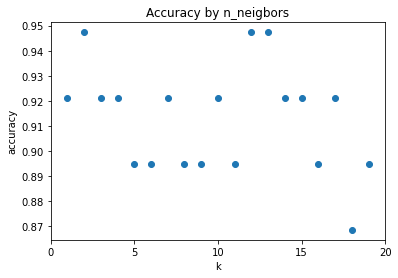

In [8]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by n_neigbors')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

How sensitive is k-NN classification accuracy to the train/test split proportion?

Text(0.5, 1.0, 'Accuracy by Split_size')

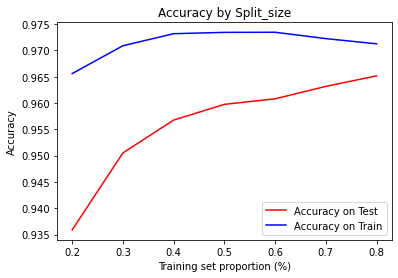

In [9]:
# size of the training set
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

scores_test_mean = []
scores_train_mean = []

for s in t:
    scores_test = []
    scores_train = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                            y,
                                                            test_size=1-s)
        knn.fit(X_train, y_train)
        scores_test.append(knn.score(X_test, y_test))
        scores_train.append(knn.score(X_train, y_train))
    scores_test_mean.append(np.mean(scores_test))
    scores_train_mean.append(np.mean(scores_train))

plt.plot(t, scores_test_mean, color='red', label='Accuracy on Test')
plt.plot(t, scores_train_mean, color='blue', label='Accuracy on Train')

plt.xlabel('Training set proportion (%)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy by Split_size')

In [23]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the sa

## Distance: Manhattan and Euclidean

In [28]:
A=np.array([1, 1])
B=np.array([5, 4])

# Euclidian
d=math.sqrt((A[0]-B[0])**2+(A[1]-B[1])**2)
print('Euclidian distance between A and B is: ', d)

Euclidian distance between A and B is:  5.0


In [30]:
dist = DistanceMetric.get_metric('euclidean')
v = [[1, 1], [5, 4]]
d=dist.pairwise(v)
print('Euclidian Distance between A= {}, B= {} is {} '.format([1, 1], [5, 4],d[0,1] ) )

Euclidian Distance between A= [1, 1], B= [5, 4] is 5.0 


In [31]:
# Manhatan
M_dist=DistanceMetric.get_metric('manhattan')
M_d=M_dist.pairwise(v)
print('Manhattan distance between A= {}, B= {} is {} '.format([1, 1], [5, 4],M_d[0,1] ))

Manhattan distance between A= [1, 1], B= [5, 4] is 7.0 


**Exercise:**
Try to classify Iris data using KNN for n_neighbors=7 using both Euclidian and Manhatan distances. Name these models as "E_knn" and "M_knn". Compare their accuracy scores. Which model is better?

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
M_knn = KNeighborsClassifier(n_neighbors=5,p=1 )
E_knn=KNeighborsClassifier(n_neighbors=5, p=2)

M_knn.fit(X_train, y_train)
E_knn.fit(X_train, y_train)


print('****** Manhatan Distance ******')

print('Manhatan: Accuracy on Test: {:.4f} \n'.format(M_knn.score(X_test, y_test)))
print('Manhatan: Accuracy on Train: {:.4f} \n'.format(M_knn.score(X_train, y_train)))


****** Manhatan Distance ******
Manhatan: Accuracy on Test: 0.8947 

Manhatan: Accuracy on Train: 0.9732 



In [14]:
print('****** Euclidean Distance ******')

print('Euclidean: Accuracy on Test: {:.4f} \n'.format(E_knn.score(X_test, y_test)))
print('Euclidean: Accuracy on Train: {:.4f} \n'.format(E_knn.score(X_train, y_train)))


****** Euclidean Distance ******
Euclidean: Accuracy on Test: 0.8947 

Euclidean: Accuracy on Train: 0.9821 




Load the fruits data file and apply KNN to classify fruits.

1. Load Data
2. Examine data
3. Create train-test split
4. Create classifier object
5. Train the classifier (fit the estimator) using the training data for k=5
6. Estimate the accuracy of the classifier on future data, using the test data
7. Compare the accuracy of your model for different values of k on train and test
8. Compare the accuracy of your model for different distance metrics on train and test
9. Examine how scaling the data will impact the accuracy

In [16]:
fruits = pd.read_table('../Data/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


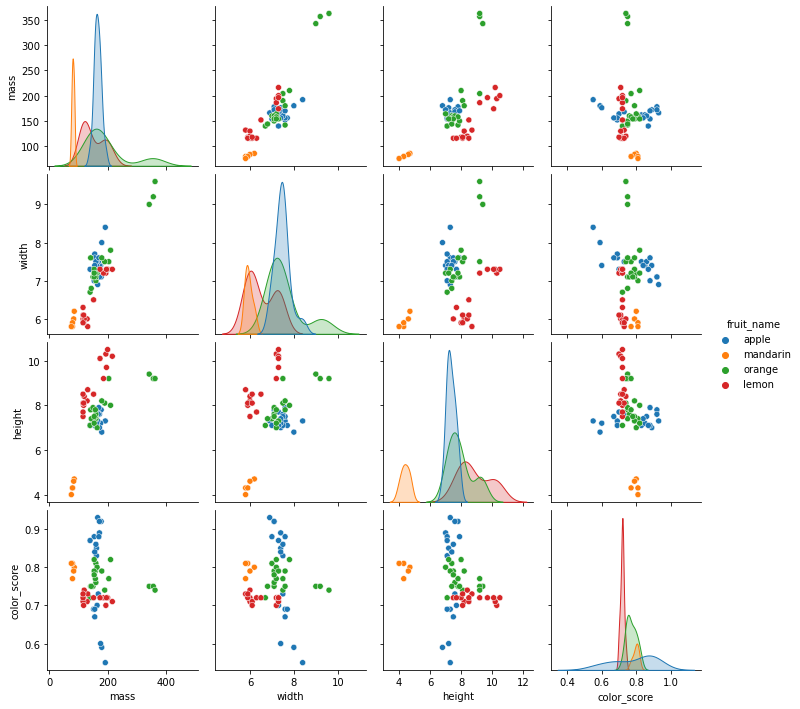

In [17]:
sns.pairplot(fruits[[c for c in fruits.columns if not c == "fruit_label"]], hue='fruit_name');

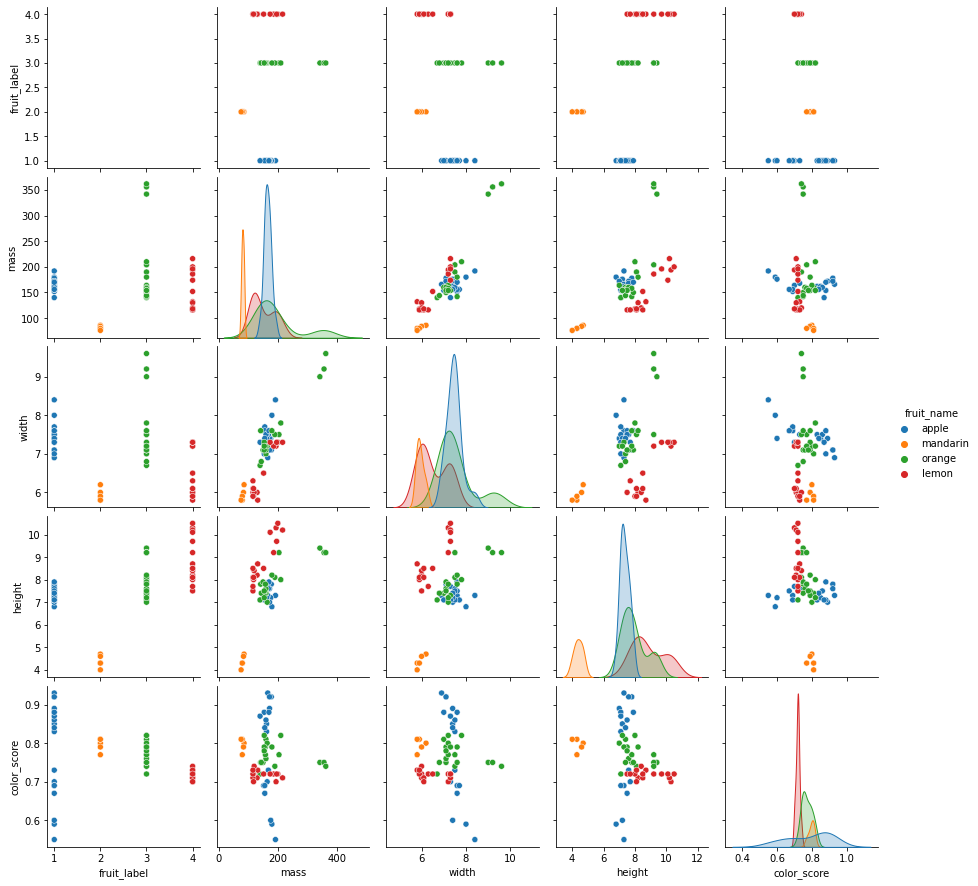

In [25]:
sns.pairplot(fruits,hue='fruit_name')   

In [27]:
X = fruits[['mass', 'width', 'height','color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy for k = 5 on train set: {} \n'.format(knn.score(X_train, y_train)))
print('Accuracy for k = 5 on test data: {} \n'.format(knn.score(X_test, y_test)))

Accuracy for k = 5 on train set: 0.7727272727272727 

Accuracy for k = 5 on test data: 0.5333333333333333 



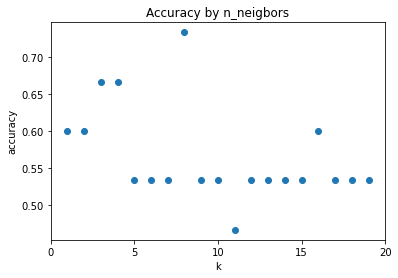

In [28]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by n_neigbors')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [29]:
M_knn = KNeighborsClassifier(n_neighbors=8,p=1 )
E_knn=KNeighborsClassifier(n_neighbors=8, p=2)

M_knn.fit(X_train, y_train)
E_knn.fit(X_train, y_train)


print('****** Manhatan Distance ******')

print('Manhatan: Accuracy: {} \n'.format(M_knn.score(X_test, y_test)))

print('****** Euclidian Distance ******')
print('Euclidian: Accuracy: {} \n'.format(E_knn.score(X_test, y_test)))

****** Manhatan Distance ******
Manhatan: Accuracy: 0.7333333333333333 

****** Euclidian Distance ******
Euclidian: Accuracy: 0.7333333333333333 



In [31]:

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

E_knn = KNeighborsClassifier(n_neighbors=5)
E_knn.fit(X_train_s, y_train)
print('Accuracy for k = 5 & Euclidian on train set: {} \n'.format(E_knn.score(X_train_s, y_train)))
print('Accuracy for k = 5 & Euclidian on test data: {} \n'.format(E_knn.score(X_test_s, y_test)))

M_knn = KNeighborsClassifier(n_neighbors=5, p=1)
M_knn.fit(X_train_s, y_train)
print('Accuracy for k = 5 & Manhatan on train set: {} \n'.format(M_knn.score(X_train_s, y_train)))
print('Accuracy for k = 5 & Manhatan on test data: {} \n'.format(M_knn.score(X_test_s, y_test)))

Accuracy for k = 5 & Euclidian on train set: 0.9772727272727273 

Accuracy for k = 5 & Euclidian on test data: 0.8666666666666667 

Accuracy for k = 5 & Manhatan on train set: 0.9545454545454546 

Accuracy for k = 5 & Manhatan on test data: 0.8 



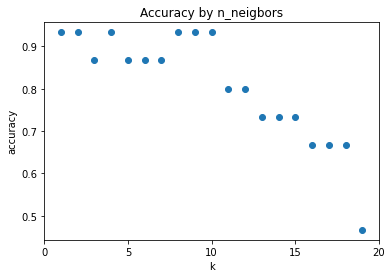

In [32]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train_s, y_train)
    scores.append(knn.score(X_test_s, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by n_neigbors')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);